### 데이터 준비

In [2]:
# 데이터 로드
import sklearn.datasets

diabetes = sklearn.datasets.load_diabetes()

In [3]:
import pandas as pd

In [4]:
# X, y 저장
df_X = diabetes.data
df_Y = diabetes.target

In [5]:
# 데이터 타입 확인
type(df_X)

numpy.ndarray

In [6]:
# train-test 분리
import sklearn.model_selection

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df_X, df_Y)

### 모델 준비

In [7]:
import numpy as np

In [61]:
# 모델함수 구현, 나중에 속도를 줄이고자 for가 아닌 행렬연산으로 고쳤다
def model(x, w, b):
    # pred = 0

    # for i in range(len(x[0])):
    #     pred += x[:, i] * w[i]
    # pred += b

    # return pred
    return x.dot(w) + b

In [9]:
# loss, mse 구현
def loss(x, w, b, y):
    pred = model(x, w, b)

    return ((y - pred) ** 2).mean()

In [10]:
# gradient 구현
def grad(x, w, b, y):
    n = len(y)
    pred = model(x, w, b)

    dw = (1 / n) * 2 * x.T.dot(pred - y)
    db = 2 * (pred - y).mean()

    return dw, db

### 모델 학습

하이퍼 파리미터를 학습률과 반복수로 하였다.

In [87]:
def fit(epoch, lr):
    history = []
    # 초기 무작위 가중치 설정
    w = [np.random.rand() for _ in range(len(X_train[0]))]
    b = np.random.rand()

    # 학습
    for i in range(epoch):
        dw, db = grad(X_train, w, b, y_train)
        w -= lr * dw
        b -= lr * db
        if i % 10 == 0:
            history.append(loss(X_train, w, b, y_train))
    return history, w, b

In [88]:
history1, w, b = fit(500, 0.001)

In [89]:
import matplotlib.pyplot as plt

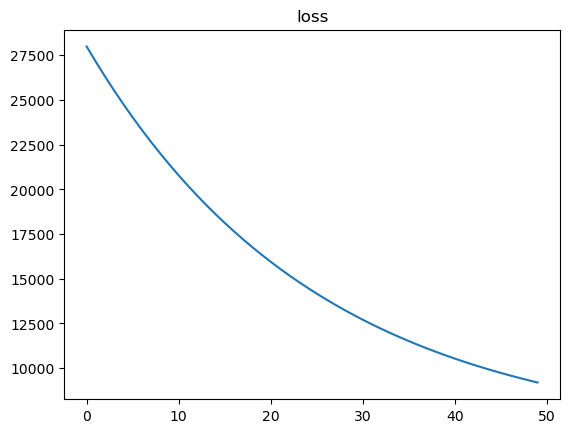

In [90]:
plt.title("loss")
plt.plot(history1)

아직 loss 수렴이 안되어 epoch를 더 늘려보았다.

In [91]:
history2, w, b = fit(2000, 0.001)

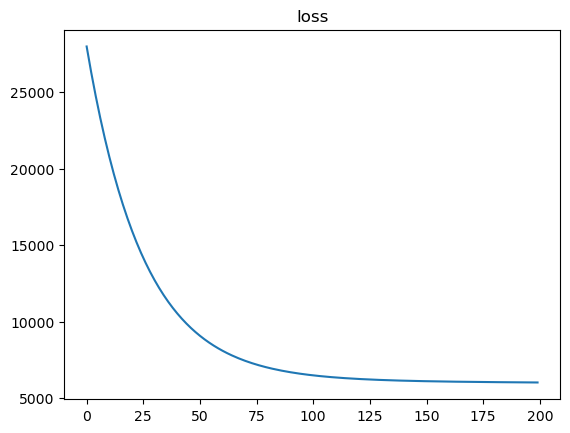

In [92]:
plt.title("loss")
plt.plot(history2)

In [93]:
history2[100]

6482.069413070984

만족스러운 수치가 아니라 학습률을 다르게 하며 학습 시도하였다.

In [94]:
lr = [0.01, 0.001, 0.0001]
hist_list = []
for i in lr:
    hist, w, b = fit(1000, i)
    hist_list.append([hist, w, b])

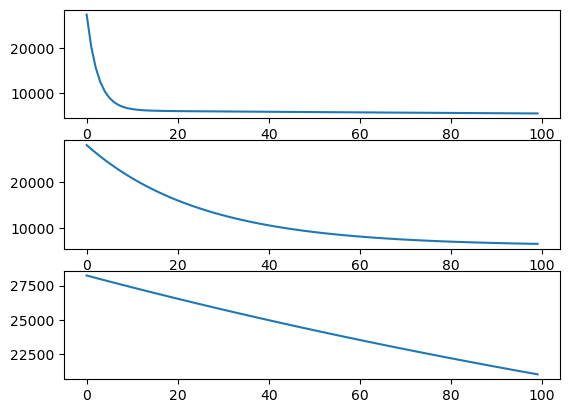

In [95]:
for i, l in enumerate(lr):
    plt.subplot(3, 1, i + 1)
    plt.plot(hist_list[i][0])

In [165]:
#첫번째 그림에서 최소 loss의 근삿값 
hist_list[0][0][20]

6015.875751495103

### 데이터 재구성
프로젝트 목표인 `MSE 손실함수값 3000 이하를 달성`에 실패하여 특성을 제거하려고 시도해 보았다.

In [96]:
df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_Y = pd.DataFrame(diabetes.target, columns=["target"])

In [97]:
df_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [98]:
df_X.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


모든 특성이 다른 의미를 가지고 있고, 상관관계도 적어 특정 특성을 제거하기 애매하였다.

### 모델 평가

일단 지금까지 알아본 최선 모델로 평가해보았다.

In [99]:
hist, w, b = fit(2000, 0.001)

In [100]:
# test set에 대한 loss
loss(X_test, w, b, y_test)

5206.97150051001

In [101]:
pred = model(X_test, w, b)

### 시각화

lms에서는 첫번째 변수를 가지로 확인하라고 하였지만, 이상하여 모든 변수에 대해 확인해보았다.

<function matplotlib.pyplot.show(close=None, block=None)>

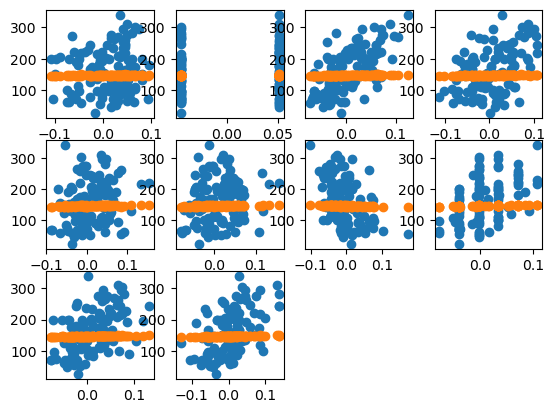

In [102]:
for i in range(len(X_test[0])):
    plt.subplot(3, 4, i + 1)
    plt.scatter(X_test[:, i], y_test)
    plt.scatter(X_test[:, i], pred)
plt.show

### 문제 탐색

시각화를 보아 학습에 실패한 것을 볼 수 있다.

아래를 보면 모든 예측이 비슷한 것을 볼 수 있어 학습에 실패한 것으로 보인다.

sklearn의 LinearRegression을 사용하면 목표인 3천이하로 loss가 감소하는데 일단 회귀로 풀 수 있는 문제라 가정하고 더 시도를 하였다.

In [37]:
pred

array([146.43586657, 145.28169412, 146.6391057 , 146.47960114,
       145.42777972, 146.50013132, 146.86916918, 148.68625311,
       144.28093753, 148.48265028, 145.55273358, 148.21592134,
       147.85550726, 147.79938219, 147.73120041, 149.26638693,
       149.40582004, 147.31947756, 145.82567974, 147.30128361,
       145.69595004, 143.76421418, 147.18297069, 147.58378212,
       146.09763518, 148.537282  , 146.43091124, 147.01951864,
       146.39821714, 148.01934459, 146.66124757, 146.875672  ,
       144.1972707 , 146.04988883, 145.33292299, 145.10788542,
       147.60791443, 145.11140979, 145.19132505, 145.07691254,
       147.37731904, 146.01477515, 149.07206098, 146.47995264,
       146.25779928, 143.88678899, 147.27392227, 143.71500039,
       143.52238432, 147.9534007 , 147.80746505, 144.92579213,
       145.0004444 , 146.98174094, 146.93778377, 143.89381437,
       145.26520242, 147.71708115, 146.37999311, 145.51030882,
       145.86589791, 146.79392165, 145.89790569, 144.52

In [42]:
X_test

array([[ 0.04170844,  0.05068012,  0.06169621, ..., -0.00259226,
        -0.01495969,  0.01134862],
       [ 0.06713621,  0.05068012, -0.02991782, ..., -0.05056372,
        -0.03845972,  0.00720652],
       [ 0.04534098,  0.05068012, -0.00836158, ...,  0.03430886,
         0.02993465,  0.02791705],
       ...,
       [-0.00188202, -0.04464164, -0.06440781, ...,  0.03430886,
         0.01178548, -0.05492509],
       [ 0.08166637,  0.05068012,  0.00672779, ...,  0.09187461,
         0.05471997,  0.00720652],
       [ 0.04170844, -0.04464164, -0.04500719, ..., -0.01440062,
         0.08989708,  0.00720652]])

In [39]:
y_test.mean()

162.5045045045045

In [40]:
w

array([ 2.44695637,  0.14609553,  8.28629912,  6.22754733,  2.7573864 ,
        2.09819556, -5.44873157,  5.91025407,  8.15253662,  4.78338893])

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

model_skl = LinearRegression()
model_skl.fit(X_train, y_train)
pred_skl = model_skl.predict(X_test)
mse(y_test, pred_skl)

2528.1100321305203

<function matplotlib.pyplot.show(close=None, block=None)>

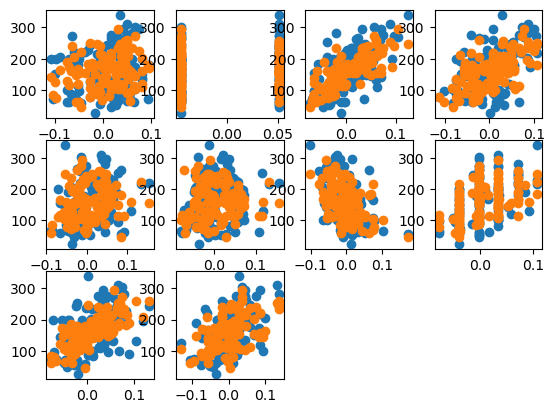

In [60]:
for i in range(len(X_test[0])):
    plt.subplot(3, 4, i + 1)
    plt.scatter(X_test[:, i], y_test)
    plt.scatter(X_test[:, i], pred_skl)
plt.show

### 결론

**최종 mse: 2434.878435828302**

학습된 w를 보니 초기값에서 많이 벗어나지 못하는 것을 보아 처음에 시도한 학습률 보다 높게 epoch와 학습률을 올려 보니 학습을 성공적으로 되었다.

처음 시도할 때 학습률이 이렇게 높아야할 지 모르고 낮은 값만을 시도하여 문제가 해결되지 않았었다. 다음부터는 더 넓은 범위를 시도해야 할 듯 하다.

프로젝트를 마지막까지 진행을 하니 처음 학습이 안된것 처럼 보인것이 **언더피팅**이라는 것을 알 수 있었다. 처음에는 loss의 감소가 더 되지 않아 학습이 로컬 최솟값에 빠진것이 아닌가 하며 이걸 어떻게 해결해야할 지 막막했는데, 간단한 문제라 약간 진이 빠졌다. 오버피팅에 주의하는 것을 주로 배우다보니 언더피팅에 대해서 은연중에 생각을 안하고 무시하고 있었던 것 같다. 

In [158]:
hist2, w2, b2 = fit(5000, 0.1)

In [159]:
# test set에 대한 loss
loss(X_test, w2, b2, y_test)

2434.878435828302

In [160]:
pred2 = model(X_test, w2, b2)

<function matplotlib.pyplot.show(close=None, block=None)>

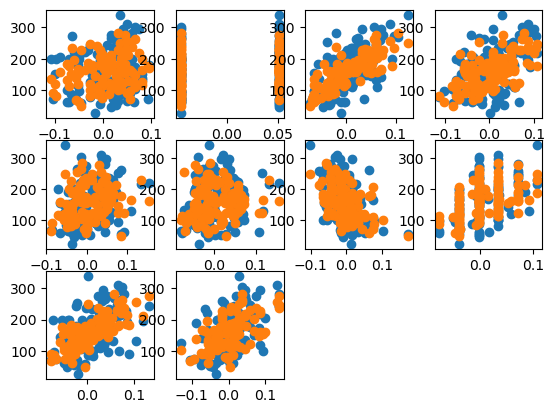

In [161]:
for i in range(len(X_test[0])):
    plt.subplot(3, 4, i + 1)
    plt.scatter(X_test[:, i], y_test)
    plt.scatter(X_test[:, i], pred2)
plt.show

In [162]:
w2

array([  27.16017275, -218.47490497,  480.41297071,  315.16630152,
        -47.76211786, -135.06364092, -209.13729579,   95.52796883,
        461.00738403,   78.79745617])

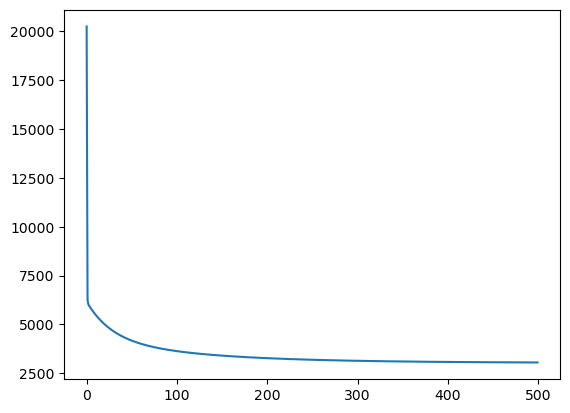

In [166]:
plt.plot(hist2)

#### 언더피팅을 고려하지 못한 이유

언더피팅을 고려하지 못한 것은 loss가 **이미 수렴한 것처럼** 보였기 때문이었다.  

아래 두 그래프를 보면 위에서는 loss가 수렴하는 것처럼 보이지만 이는 **y스케일의 함정**임을 알 수 있었다. 

y(loss)가 2만 5천부터 시작하니 epoch 20 이후부터 수렴하는 것처럼 보여도 실제로는 6000 -> 5500 까지 꾸준히 감소하고 있었다.

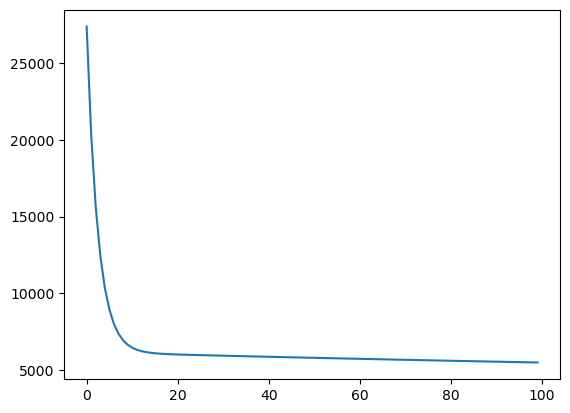

In [172]:
# loss를 더 자세히 분석
plt.plot(hist_list[0][0])

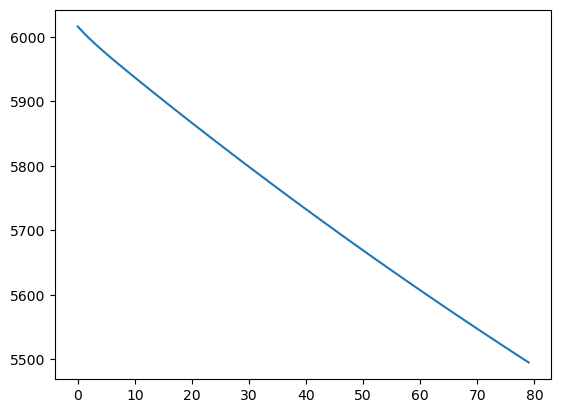

In [173]:
plt.plot(hist_list[0][0][20:])